In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [37]:
import pyatomdb as pa
import pickle as pck
from astropy import constants as co
from astropy import units as un

In [39]:
print(co.N_A.value)

6.022140857e+23


In [3]:
powerdata = loadtxt("Power_atomdb_3.0.8.dat", skiprows=1)

In [4]:
?loadtxt

In [13]:
print powerdata[:,2:]

[[-23.537226 -22.472555 -21.613805 ..., -18.914837 -18.952001 -18.989153]
 [-23.127354 -23.194513 -23.260741 ..., -22.438915 -22.410951 -22.389559]
 [-28.57275  -26.516677 -24.880094 ..., -19.214165 -19.238079 -19.267038]
 ..., 
 [-17.776584 -17.834385 -17.893068 ..., -19.041287 -19.042134 -19.046961]
 [-17.066767 -17.120951 -17.175972 ..., -19.134703 -19.137854 -19.143506]
 [-17.067491 -17.126349 -17.183913 ..., -19.325356 -19.332041 -19.3405  ]]


In [7]:
powerdata.shape

(434, 53)

In [26]:
powerdata[logical_and(powerdata[:,0]==2., powerdata[:,1]==1), 2:]

array([[-28.57275 , -26.516677, -24.880094, -23.576692, -22.536662,
        -21.552326, -20.905345, -20.396744, -19.999122, -19.69111 ,
        -19.456229, -19.281605, -19.156605, -19.071717, -19.018054,
        -18.987495, -18.973129, -18.969575, -18.972994, -18.980853,
        -18.991603, -19.004357, -19.018649, -19.034254, -19.051074,
        -19.069073, -19.088233, -19.10853 , -19.129922, -19.152336,
        -19.175658, -19.199713, -19.224234, -19.248816, -19.272847,
        -19.295407, -19.315157, -19.330243, -19.338334, -19.336987,
        -19.324513, -19.301246, -19.27052 , -19.238319, -19.21135 ,
        -19.19463 , -19.19019 , -19.197398, -19.214165, -19.238079,
        -19.267038]])

In [23]:
tem_plist = linspace(4,9,51)
print(tem_plist)

[ 4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4
  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9. ]


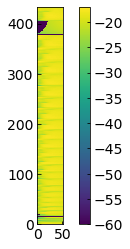

In [14]:
imshow(powerdata[:,2:])
colorbar()

In [18]:
# load simulation

In [185]:
with open("nlist.pkl","r") as f:
    nlist=pck.load(f)
with open("tlist.pkl","r") as f:
    tlist=pck.load(f)
with open("timelist.pkl","r") as f:
    timelist=pck.load(f)
with open("enuclist.pkl","r") as f:
    enuclist=pck.load(f)

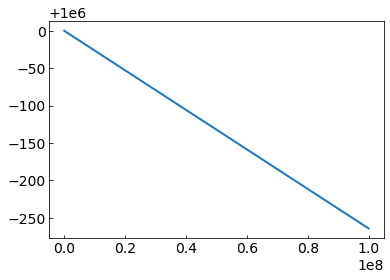

In [6]:
plot(timelist, tlist)
#yscale("log")

In [31]:
timelist[1]-timelist[0]

100000.0

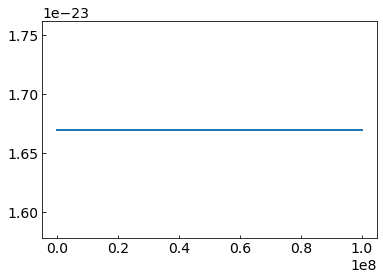

In [7]:
plot(timelist, nlist)

In [30]:
norm=nlist[0]
nnlist = nlist/norm
print(nnlist[16])

1.0


In [9]:
elements=["He","C", "N", "O", "Ne", "Mg", "Si", "S", "Ar", "Ca", "Fe", "Ni"]
zlist=[2,6,7,8,10,12,14,16,18,20,26,28]

In [143]:
mlist=[4.00260200000000,12.0110000000000,14.0067400000000,15.9994000000000,20.1797000000000,24.3050000000000,28.0855000000000, \
       32.0680000000000,39.9480000000000,40.0780000000000,55.8470000000000,58.6934000000000]
print(size(mlist))

12


In [11]:
abunlist=[0.085,3.31e-4,9.12e-5,6.61e-4,8.32e-5,1.9e-6,2.63e-5,3.31e-5,2.45e-6,1.58e-5,6.31e-6,1.99e-6]
print(size(abunlist))

12


In [12]:
elements=array(elements)
zlist=array(zlist)
mlist=array(mlist)
abunlist=array(abunlist)

In [129]:
mabar_h = 0.904347600946928
mabar_e = 5.446170220743115e-4

In [144]:
#mflist=mlist*abunlist/((mlist*abunlist).sum()+0.904+5.45e-4*1.2)
mflist=mlist*abunlist/((mlist*abunlist).sum()+mabar_h+mabar_e*1.213)
print(mflist)

[  2.68783049e-01   3.14085367e-03   1.00918886e-03   8.35498546e-03
   1.32641240e-03   3.64829349e-05   5.83550507e-04   8.38572104e-04
   7.73217488e-05   5.00269090e-04   2.78400333e-04   9.22747521e-05]


In [146]:
print(mabar_h/((mlist*abunlist).sum()+mabar_h+mabar_e*1.213))
print(mabar_e*1.213/((mlist*abunlist).sum()+mabar_h+mabar_e*1.213))

0.714456732811
0.000521906318159


In [147]:
print(tlist[1]-tlist[0])
print(tlist[2]-tlist[1])

-0.264373152517
-0.264372691279


In [148]:
frac_array = pa.apec.solve_ionbal_eigen(8, 1.e6)
print(frac_array)

[  9.22026899e-09   0.00000000e+00   1.65737285e-10   1.71885858e-07
   4.89565791e-05   4.56997566e-03   9.86387908e-01   8.98822397e-03
   4.75405932e-06]


In [ ]:
ener=zeros(tlist.size)
kk = 0
frac_p = {}
for kk in range(tlist.size):
    print kk
    for ii in range(elements.size):
        if(kk==0):
            frac_array=pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii] = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
        else:
            frac_array = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk], init_pop=frac_p[ii], tau=nnlist[kk]*1.e5)
            frac_p[ii] = frac_array
        for jj in range(zlist[ii]+1):
            temlog = log10(tlist[kk])
            pwindex = powerdata[logical_and(powerdata[:,0]==zlist[ii], \
                                       powerdata[:,1]==jj+1), 2:]
      #  print(pwindex.size, tem_plist.size)
            pwindex_t = interp(temlog, tem_plist, pwindex[0])
#            print(zlist[ii], jj, nlist[0]*0.000521906318159*co.N_A.value/mabar_e, \
             # nlist[0] * mflist[ii] * co.N_A.value/mlist[ii] * frac_array[jj], mflist[ii]  * frac_array[jj], \
             # frac_array[jj])
            s = 10**pwindex_t * nlist[kk] * mflist[ii] * frac_array[jj] * 0.000521906318159 * co.N_A.value/mlist[ii] * \
                co.N_A.value/mabar_e
            ener[kk] += s
        

In [205]:
with open("ener_py.pkl","w") as f:
    pck.dump(ener,f)

In [153]:
print(tlist[0])

1000000.0


In [154]:
0.00051691130013 * co.N_A.value/5.45e-4*nlist[0]

9.5386498020727153

In [179]:
abar=((mflist*mlist).sum()+0.000521906318159*mabar_e*1.213+mabar_h*0.714456732811)/(mflist.sum()+mabar_e*1.213+mabar_h)
print(abar,mflist.sum()+mabar_e*1.213+mabar_h,mflist.sum())

(1.6995547898143581, 1.1900295822659057, 0.28502136087120145)


In [180]:
gam=1.4
na=co.N_A.value
k=co.k_B.cgs.value
ener1=na*k*tlist[0]/((gam-1)*abar)

In [181]:
print(co.k_B.cgs.value)

1.38064852e-16


In [182]:
print(ener1)

1.22303498411e+14


In [183]:
dtem = ((gam-1)*abar)/(na*k)*ener*1.e5

In [184]:
print(dtem)

0.224657964554


In [162]:
tlist[1]-tlist[0]

-0.26437315251678228

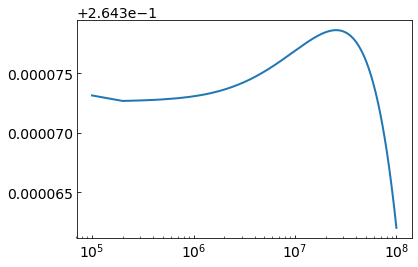

In [121]:
dtlist=tlist[1:]-tlist[:-1]
plot(timelist[1:], -dtlist)
xscale("log")

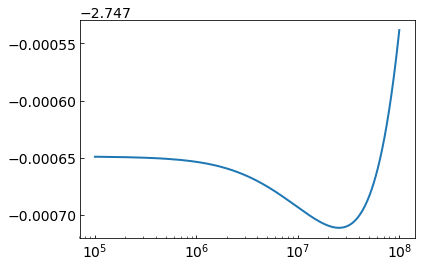

In [201]:
plot(timelist[1:], enuclist[1:]/100.)
xscale("log")

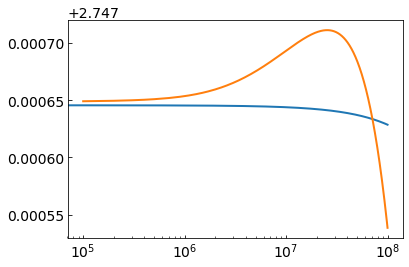

In [207]:
plot(timelist, ener/100.)
plot(timelist[1:], -enuclist[1:]/100.)
xscale("log")

In [199]:
print(ener[-1])

274.762854017


In [ ]:
plot